In [13]:
import math
import numpy as np
import pandas as pd
import pints
import matplotlib.pyplot as plt
import os
plt.rcParams.update({'font.size': 24})
from Newton_model_numba import wrappedNewton, newtonRaphsonFT

In [14]:
# specifing data location and folder for output

# Note this is only used for a time sequency

data_name = '144 150_1_cv_current_end_of_2'
file_name = data_name + '.txt'
folder = os.path.join('Data', 'processed')
folder = os.path.join(folder, '220415')
folder = os.path.join(folder, 'ph6 2m nacl 25oC')
folder = os.path.join(folder, 'ac')
# folder = os.path.join(folder, '9_2b')
folder = os.path.join(folder, '144 150_1')
folder = os.path.join(folder, 'experimental')
data_file = os.path.join(folder, file_name)

# opening data
experimental_data = pd.read_csv(data_file, sep='\t')

exp_times = np.asarray(experimental_data.time)
exp_current = np.asarray(experimental_data.current)

In [15]:
# delacring know model paramters

inital_current = 0.0 # exp_current[0]*1E-2
startPotential= -150.0E-3
revPotential = -750.0E-3
rateOfPotentialChange = -22.35174e-3

deltaepislon = 150.0E-3
electrode_area = 0.03
electode_coverage = 6.5e-11
# delacring capactiance parameters
# (gamma0, gamma1, gamma2, gamma3, omega)
cap_params = (2.04723750338681946e-04,  2.31336124514676302e-05,  6.72508062131533472e-05, -3.52789052587041763e-05,
2.19537063820266680e-04,  1.36486944707261103e-04,  2.84492337211128500e-04,  9.96760436029462717e-05,
9.04317435750307368e+02)

uncomp_resis = 7.08611444464832800e+01
Hz_interval = 0.8

10.0
x[0][-1]:  536
y[0][0]:  537
z[0]:  []


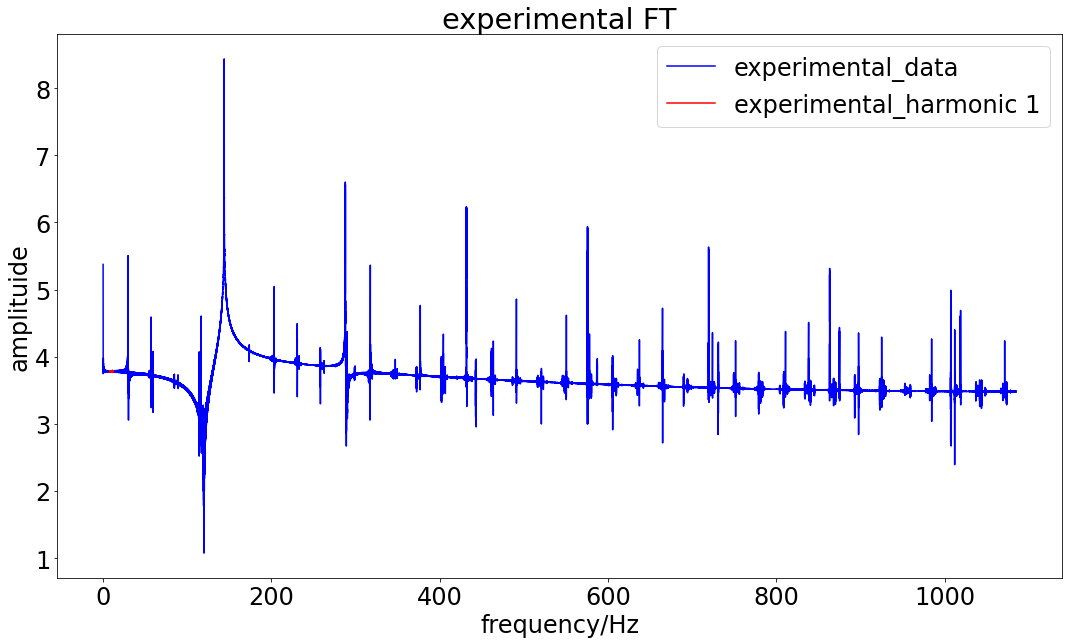

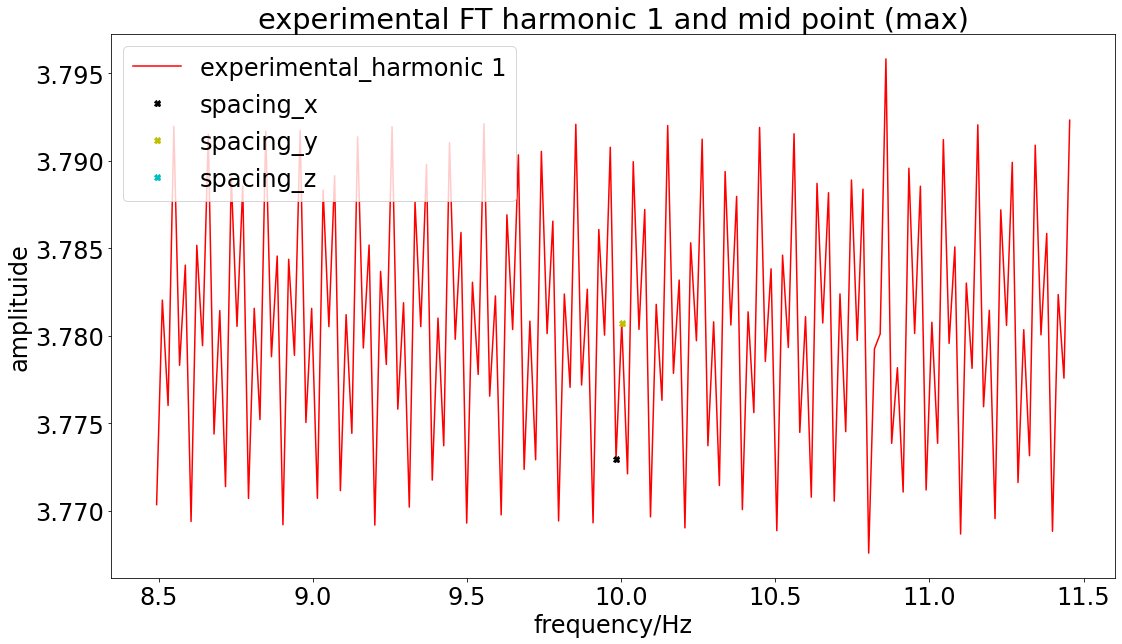

spacing:  536
x[0][-1]:  536
y[0][0]:  537
z[0]:  []


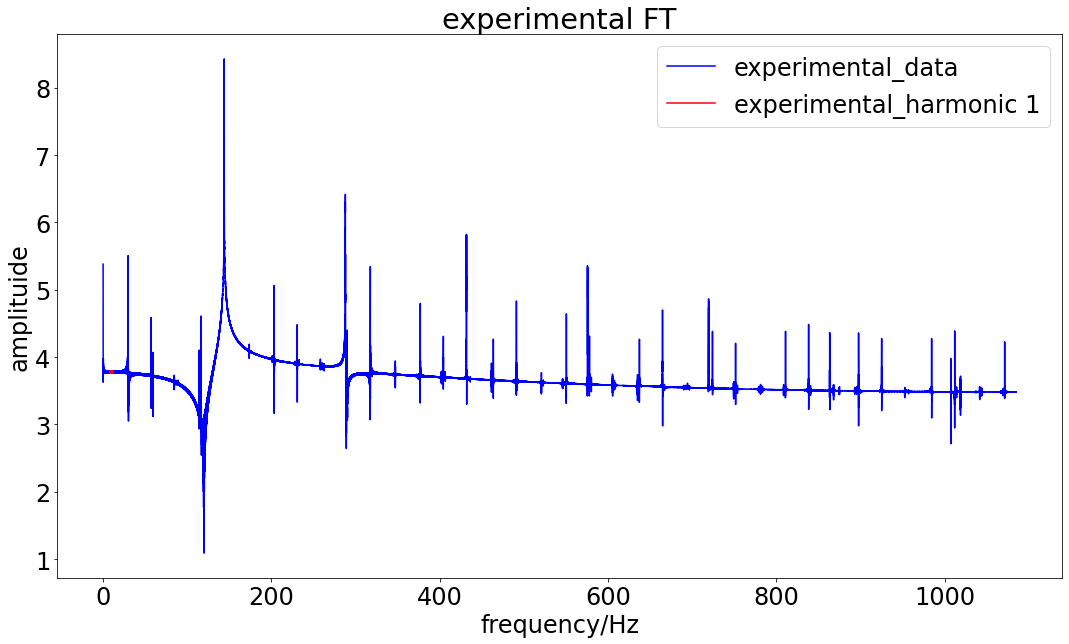

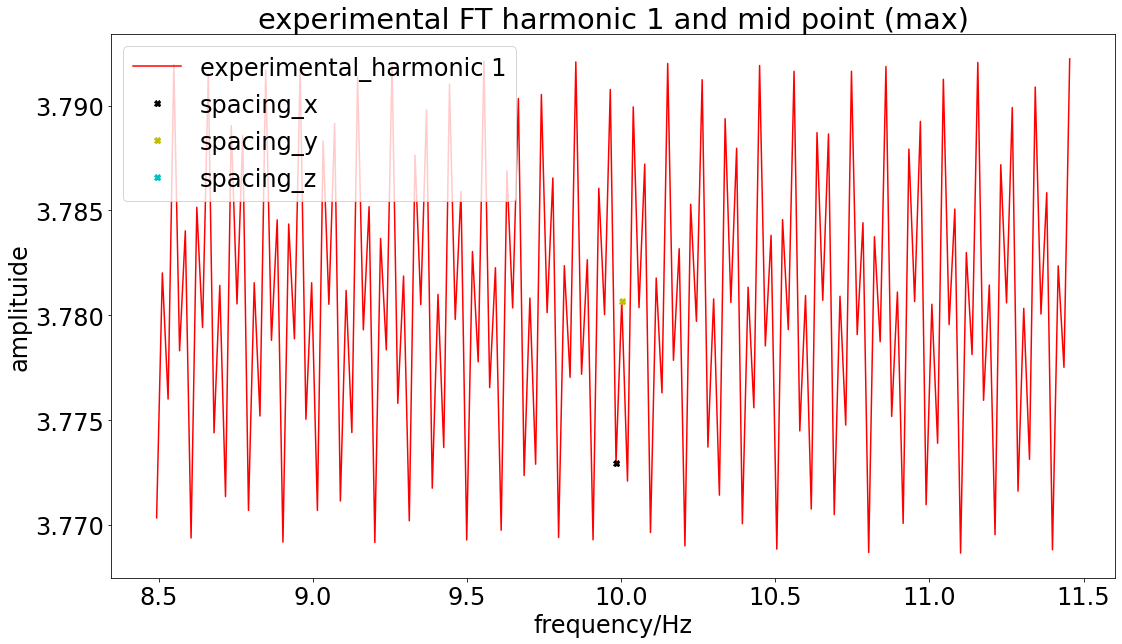

spacing:  536
x[0][-1]:  536
y[0][0]:  537
z[0]:  []


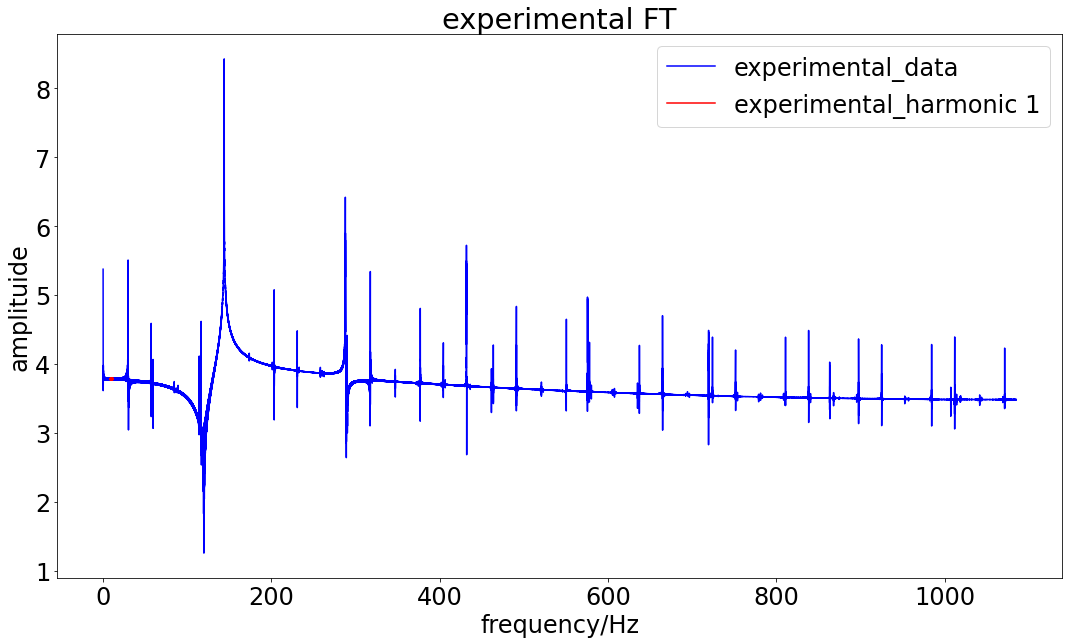

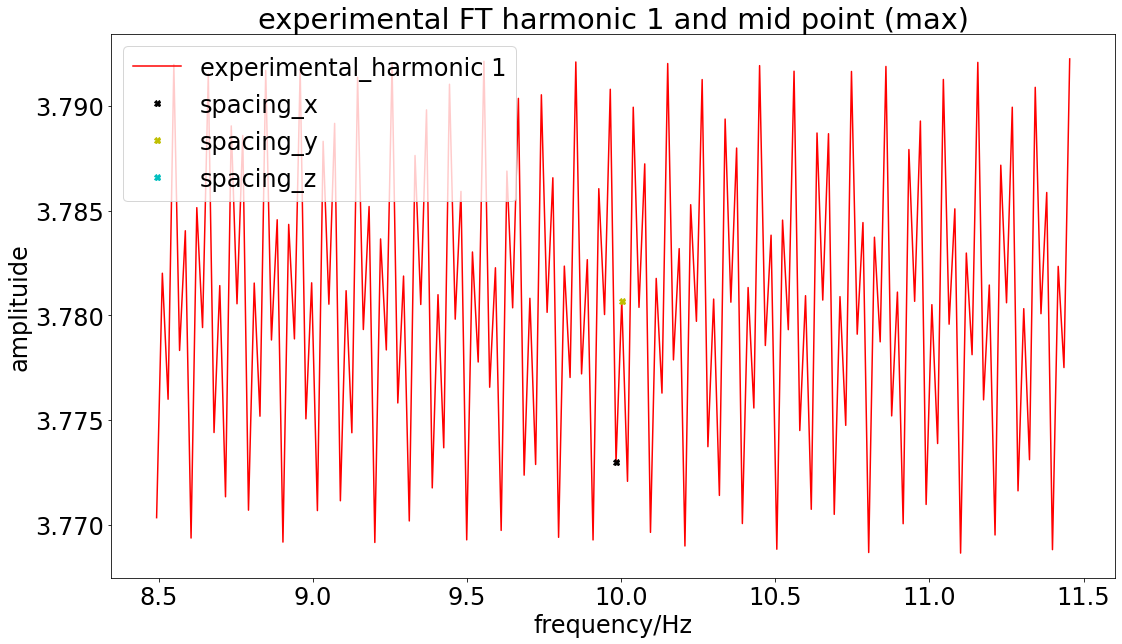

spacing:  536
50.0
x[0][-1]:  2684
y[0][0]:  2685
z[0]:  []


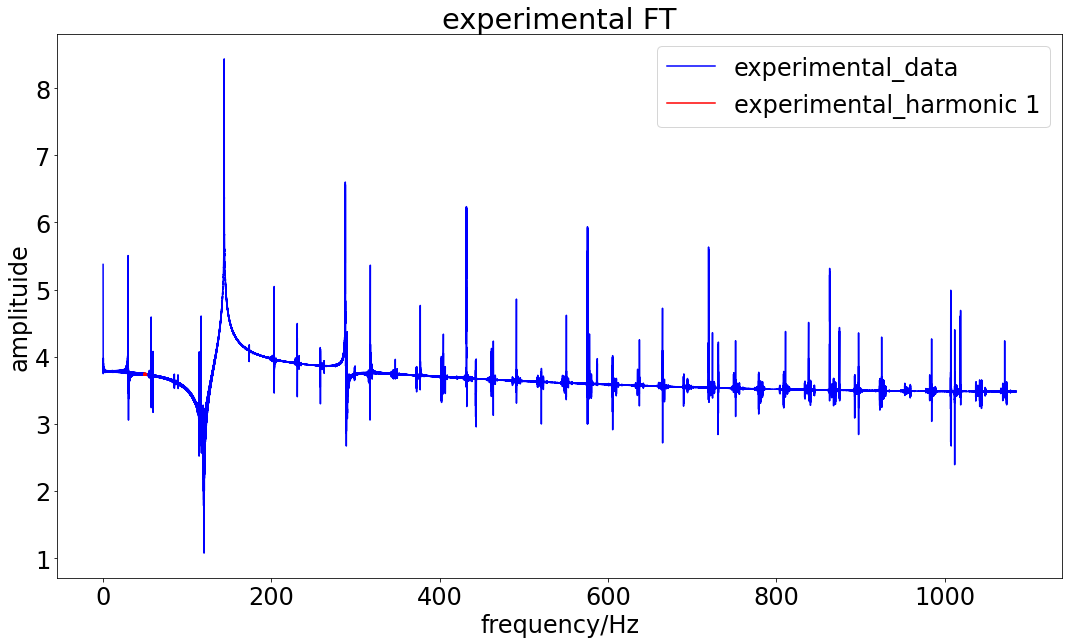

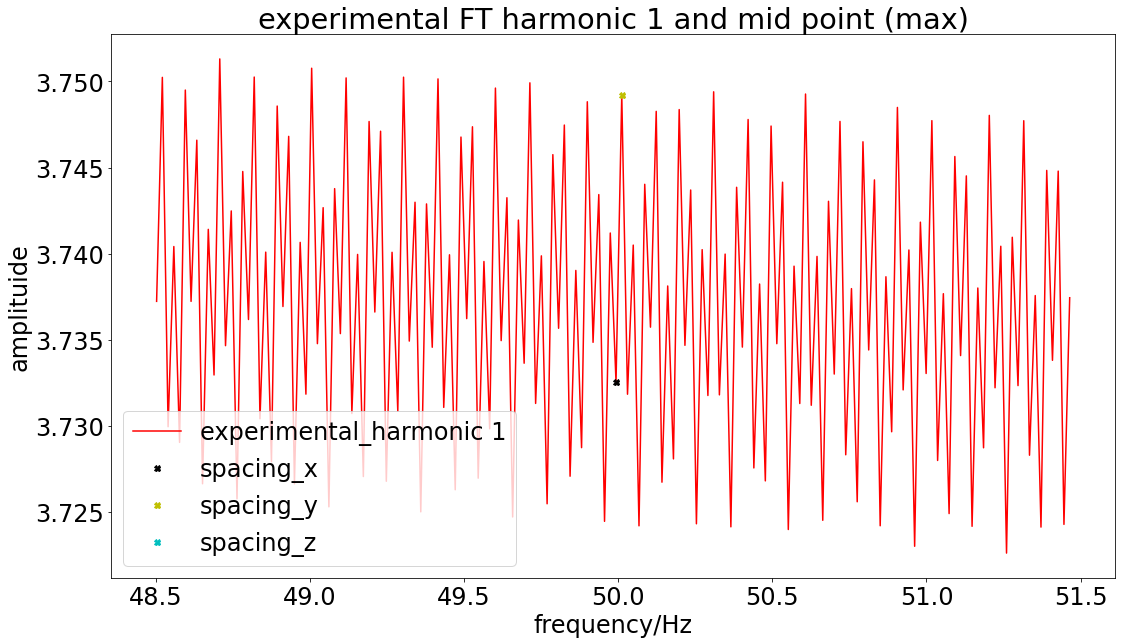

spacing:  2684
x[0][-1]:  2684
y[0][0]:  2685
z[0]:  []


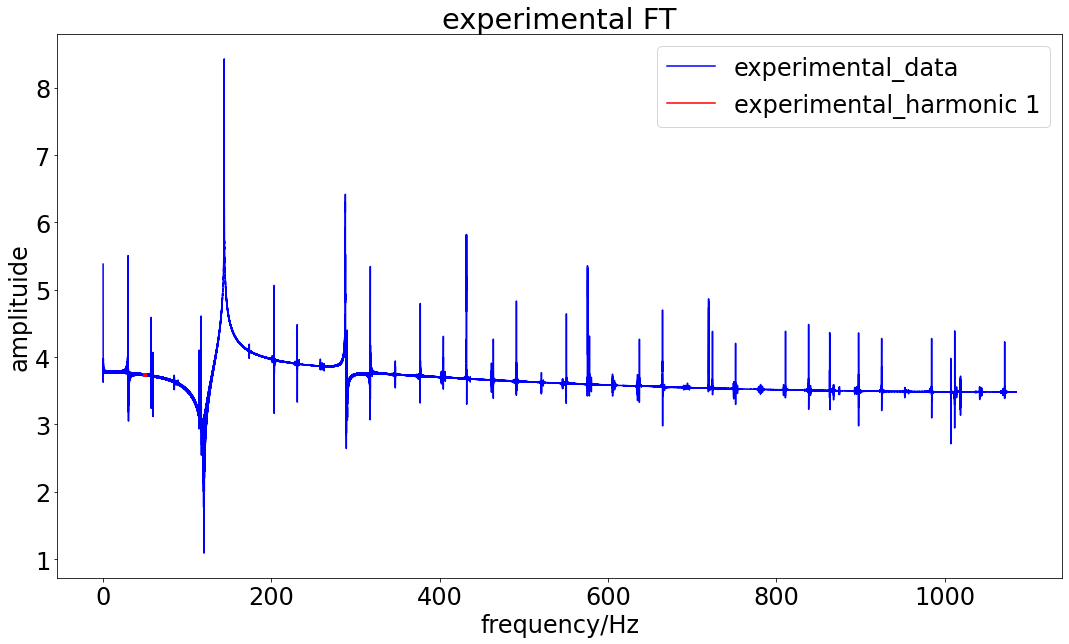

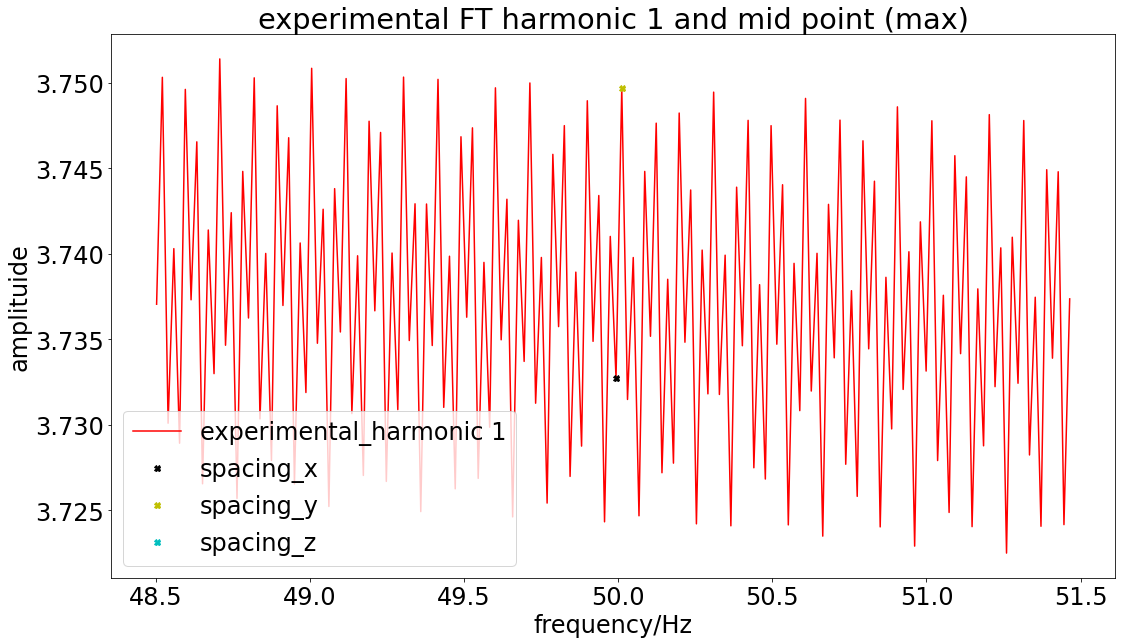

spacing:  2684
x[0][-1]:  2684
y[0][0]:  2685
z[0]:  []


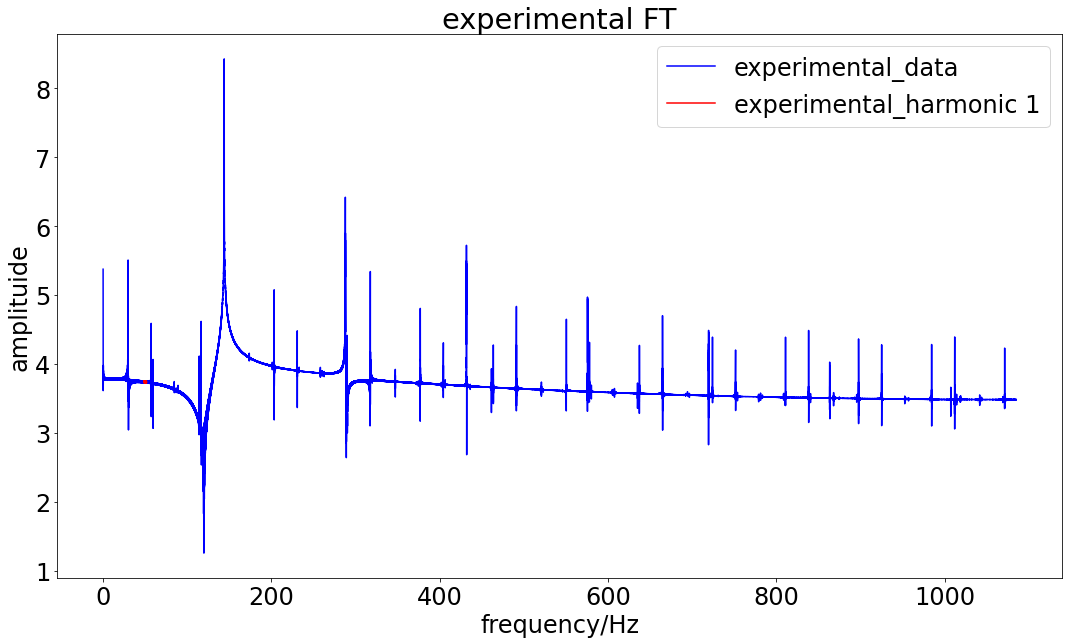

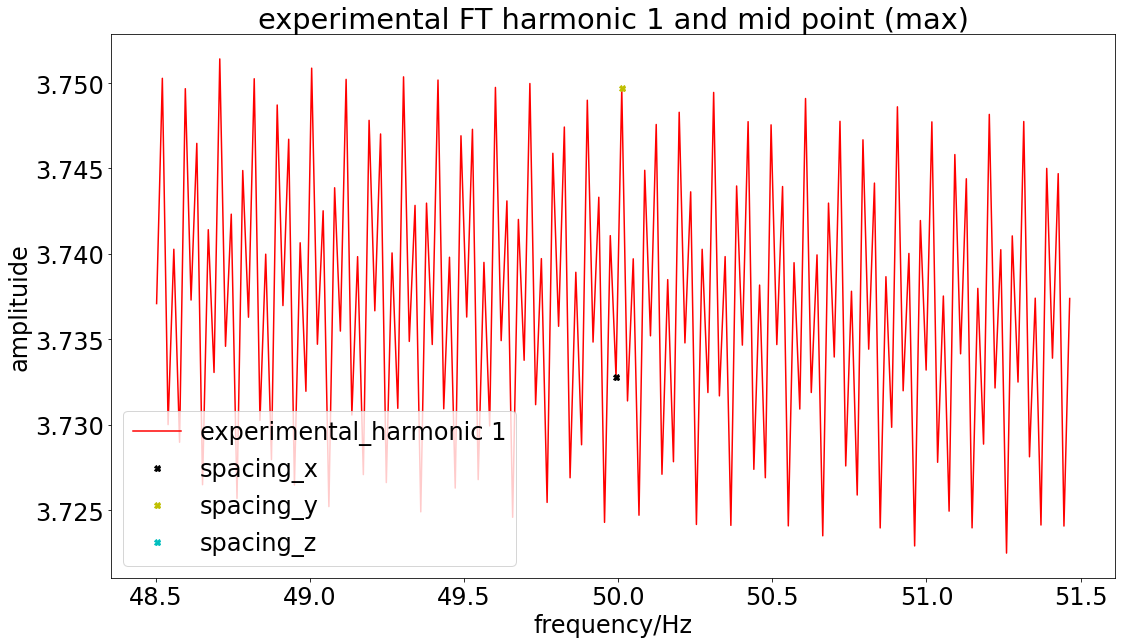

spacing:  2684
250.0
x[0][-1]:  13421
y[0][0]:  13422
z[0]:  []


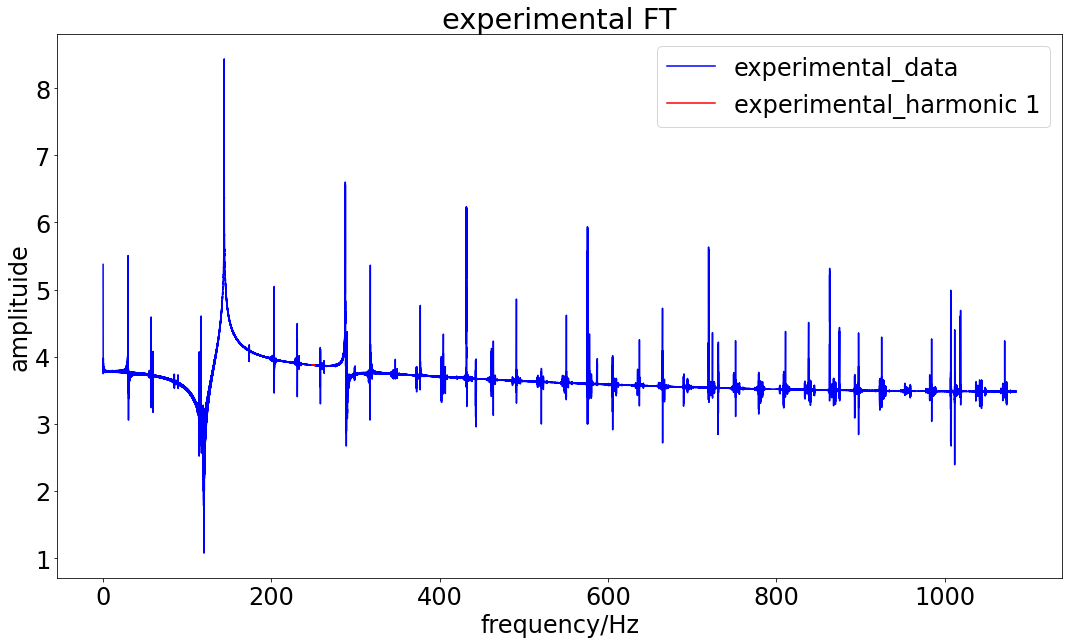

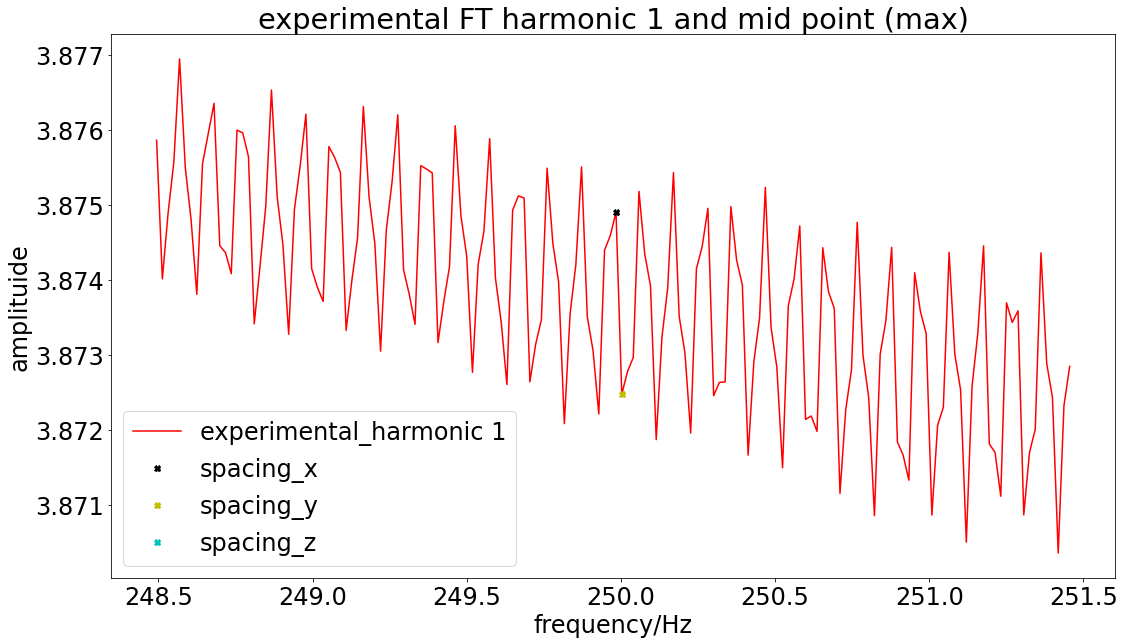

spacing:  13421
x[0][-1]:  13421
y[0][0]:  13422
z[0]:  []


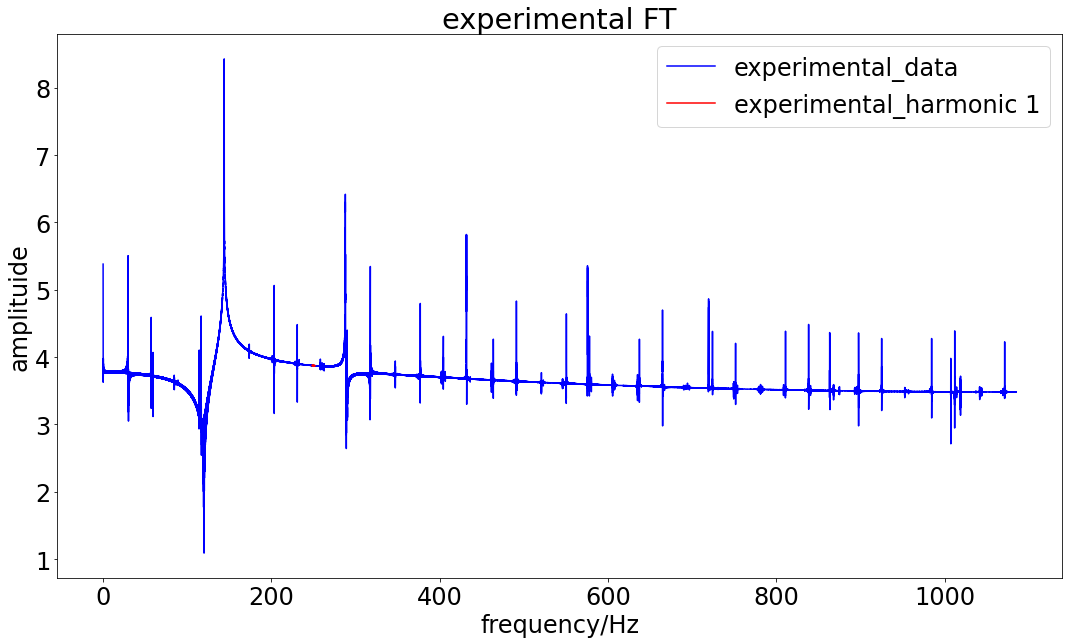

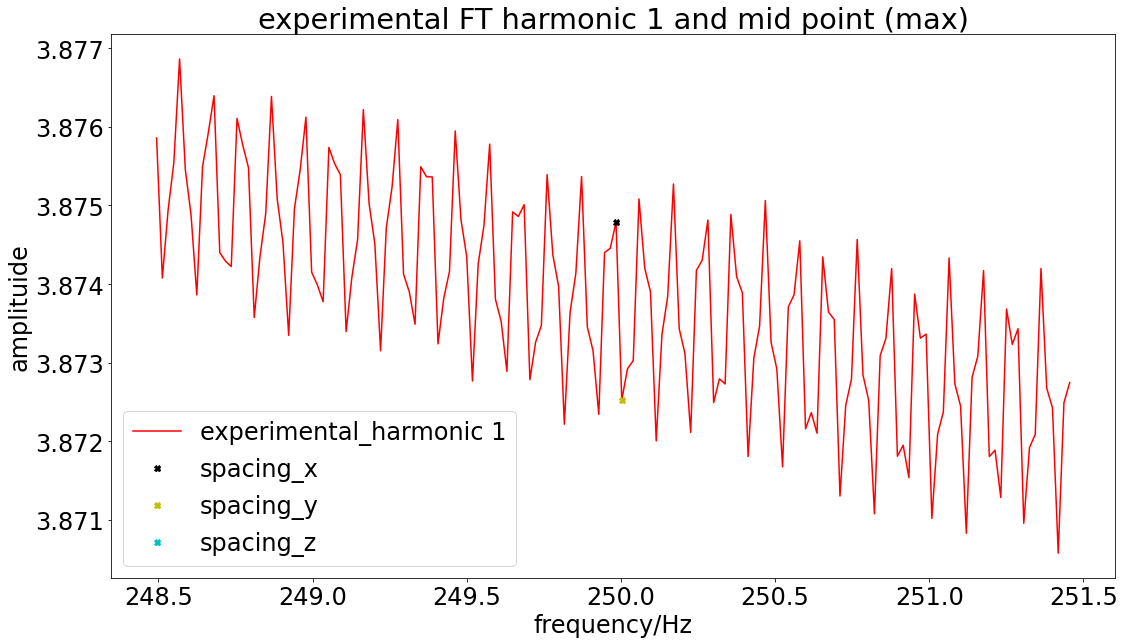

spacing:  13421
x[0][-1]:  13421
y[0][0]:  13422
z[0]:  []


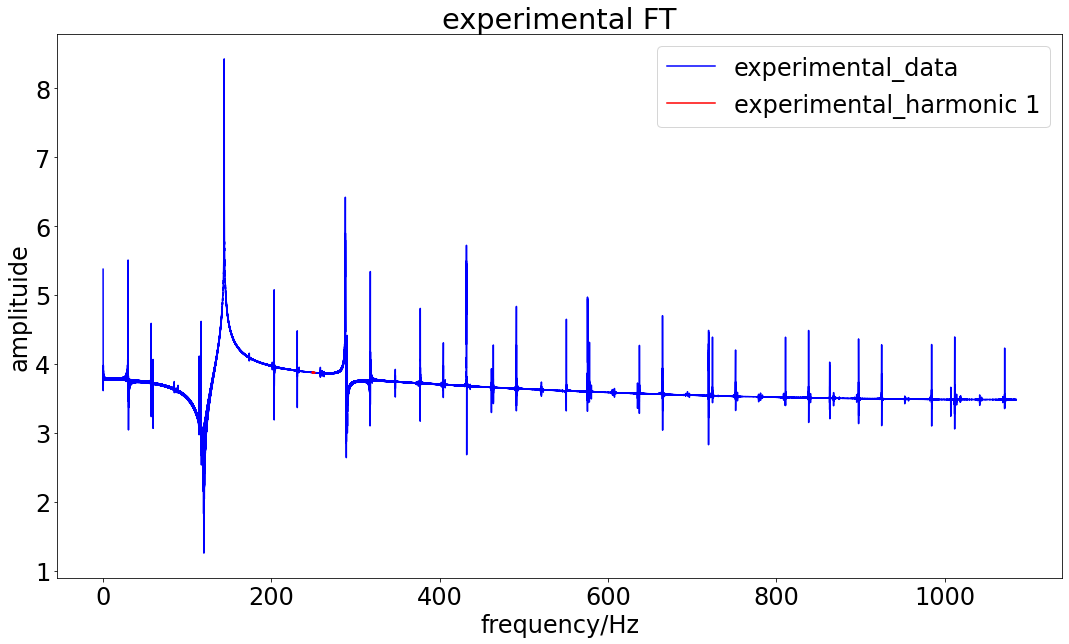

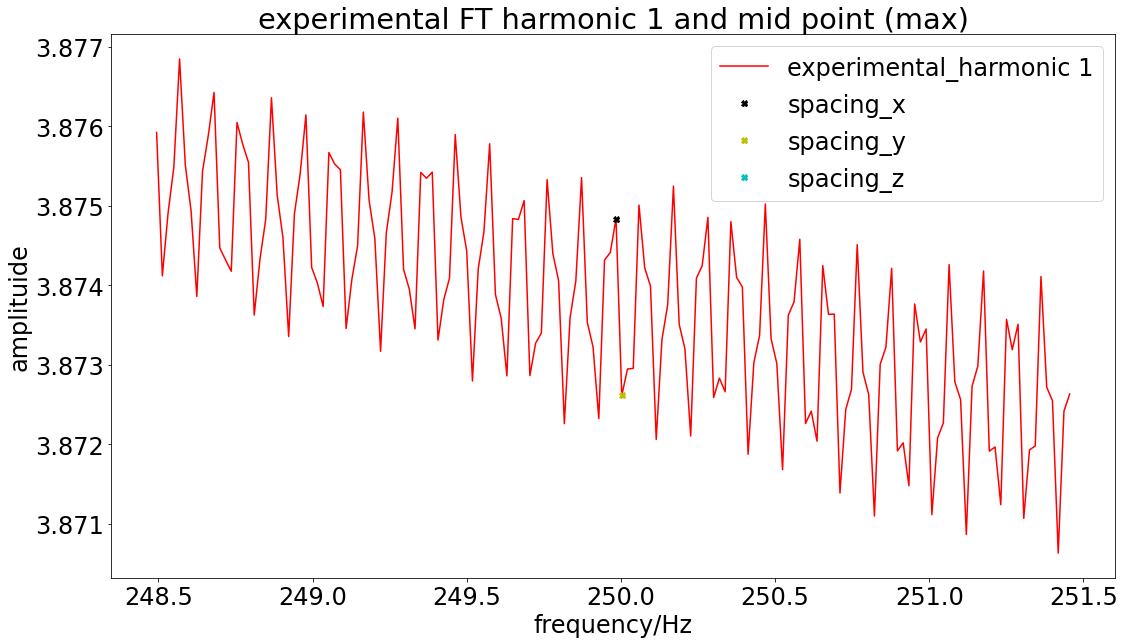

spacing:  13421


In [16]:
frequencies = [10.0, 50.0, 250.0]

ETrate = [4000, 500, 200, 10] #[40000, 20000, 10000, 5000, 1000, 500, 200, 10]

colour = ['b', 'r', 'green', 'm', 'orange', 'c', 'k', 'y']

for freq in frequencies:

    times = exp_times[::18]
    print(freq)
    # plt.figure(figsize=(18,10))
    # plt.title("simulated current freq: " + str(freq))
    # plt.ylabel("current/Amps")
    # plt.xlabel("time/s")

    # model specification
    model = wrappedNewton(times = times, inital_current=inital_current, freq=freq, startPotential= startPotential, revPotential = revPotential,
                            rateOfPotentialChange = rateOfPotentialChange, deltaepislon=deltaepislon,
                            uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage,
                            initaldiscard = 0.025, enddiscard = 0.905, cap_params=cap_params)

    for index in range(3):

        rate = ETrate[index]
        
        # specifing Fardaic parameters

        Fardaic = [rate, rate,
                   -4.66356811586286946e-01, -4.42784258594993763e-01,
                    2.27969072427586794e-02,  4.80987434392665947e-01]

        current_trace = model.simulate(parameters = Fardaic, times = times)

        spacing = model.harmonic_spacing(experimental_data = current_trace, exp_times = times)
        print('spacing: ', spacing)

        temp = model.get_non_dimensionality_constants()
        I0 = temp[-1]
        del(temp)

        dim_current = current_trace*I0

        # plt.plot(exp_times[::80] ,dim_current[::80], str(colour[index]), label = " rate: " + str(rate))
    
    del(model)
    # plt.legend(loc='best')
    # plt.show()
